In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np 

def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

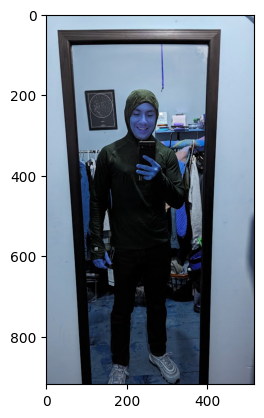

In [18]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\vision\pose_landmarks_detection\data\photo_mirror.jpg", cv2.color.BGR2RGB)

plt.imshow(img)

In [38]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

model_path = r'C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\vision\pose_landmarker_heavy.task'
mp_image = mp.Image.create_from_file(r'C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\vision\pose_landmarks_detection\data\photo_mirror.jpg')

import mediapipe as mp

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)


with PoseLandmarker.create_from_options(options) as landmarker:
    pose_landmarker_result = landmarker.detect(mp_image)

In [60]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [69]:
annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), pose_landmarker_result)

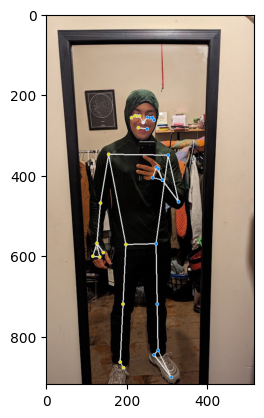

In [41]:
plt.imshow(annotated_image)

landmark {
  x: 0.4753274917602539
  y: 0.29093238711357117
  z: -0.3230131268501282
  visibility: 0.9999995231628418
}
landmark {
  x: 0.49344441294670105
  y: 0.2749519348144531
  z: -0.29928091168403625
  visibility: 0.9999980926513672
}
landmark {
  x: 0.5038463473320007
  y: 0.27532461285591125
  z: -0.29931139945983887
  visibility: 0.9999977350234985
}
landmark {
  x: 0.5137077569961548
  y: 0.27585193514823914
  z: -0.299304723739624
  visibility: 0.9999973773956299
}
landmark {
  x: 0.4576333463191986
  y: 0.2738892734050751
  z: -0.30707481503486633
  visibility: 0.9999985694885254
}
landmark {
  x: 0.443935751914978
  y: 0.27398771047592163
  z: -0.3071129620075226
  visibility: 0.9999985694885254
}
landmark {
  x: 0.4331231713294983
  y: 0.2744389474391937
  z: -0.3072511851787567
  visibility: 0.9999984502792358
}
landmark {
  x: 0.5218483209609985
  y: 0.28265097737312317
  z: -0.1207680031657219
  visibility: 0.9999943971633911
}
landmark {
  x: 0.4123944044113159
  y: 0

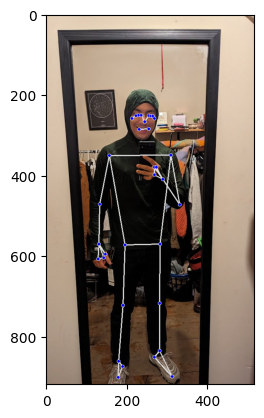

In [77]:
img = cv2.imread(r"C:\Users\COMPUBROTHER\Documents\DATA_ANALYTICS\Projects\vision\pose_landmarks_detection\data\photo_mirror.jpg", cv2.COLOR_BGR2RGB)

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mpDraw = mp.solutions.drawing_utils
mpPose = mp.solutions.pose
pose = mpPose.Pose()

results = pose.process(imgRGB)

print(results.pose_landmarks)

if results.pose_landmarks:
    mpDraw.draw_landmarks(imgRGB, results.pose_landmarks, mpPose.POSE_CONNECTIONS)

plt.imshow(imgRGB)